# Titanic-machine-learning-model

### 1. Problem Definition 
>Aim of this model is to predict the survival of Titanic passengers

### 2. Data

>Data source : https://www.kaggle.com/c/titanic/data

### 3. Evaluating
>To get the best score

### 4. Features
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [21]:
#Importinf tools

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#scikit-learn-tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,plot_roc_curve



In [22]:
#getting the data
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.shape

(891, 12)

In [6]:
#Counting the target values
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### DATA EXPLORATION (exploratory data analysis or EDA) and Visualisation

The goal here is to find out more about the data & become a subject matter export on the dataset you're working with.
1. What question(s) are you trying to solve?
2. What kind of data do we have & how we treat different types?
3. What's missing from the data and how you deal with it?
4. Where are the outliers andd why should you care about them?
5. How can you add/remove features to get more out of your data?

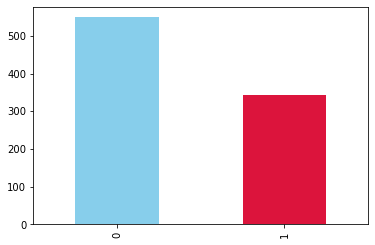

In [24]:
df["Survived"].value_counts().plot(kind="bar", color =["skyblue", "crimson"])

In [25]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survival according to sex (Sex Feature)

In [31]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [53]:
#Comparing with survival rate
ctab =pd.crosstab(df.Survived, df.Sex)
ctab

Sex,female,male
Survived,,
0,81,468
1,233,109


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

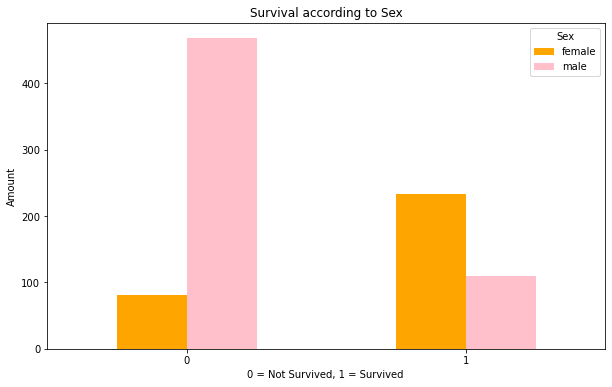

In [67]:
# Plotting crosstab
ctab.plot(kind="bar", figsize=(10,6),color=["orange", "pink"]);
plt.title("Survival according to Sex")
plt.xlabel("0 = Not Survived, 1 = Survived ")
plt.ylabel("Amount")
plt.xticks(rotation=0)

Precentage of Feamale who survived: 74.20382165605095
Precentage of Feamale who survived: 18.890814558058924


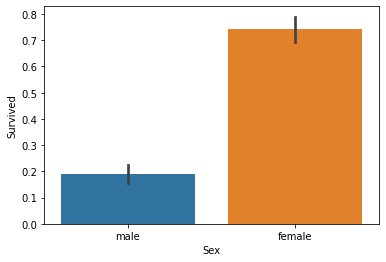

In [81]:
#total survival between male and female
sns.barplot(x="Sex", y="Survived", data=df);
print("Precentage of Feamale who survived:", df["Survived"][df["Sex"] == "female"].value_counts(normalize=True)[1]*100)
print("Precentage of Feamale who survived:", df["Survived"][df["Sex"] == "male"].value_counts(normalize=True)[1]*100)

Females had more survival ratio compared to males in given dataset

### PClass Feature

Precentage of Pclass = 1 who survived: 62.96296296296296
Precentage of Pclass = 2 who survived: 47.28260869565217
Precentage of Pclass = 3 who survived: 24.236252545824847


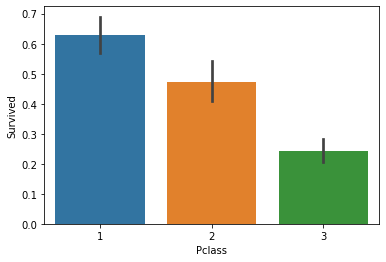

In [89]:
#ploting pclass feature
sns.barplot(x="Pclass", y="Survived", data=df)
print("Precentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize=True)[1]*100)
print("Precentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize=True)[1]*100)
print("Precentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize=True)[1]*100)

In [91]:
#comparing with survival rate
pd.crosstab(df.Survived, df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

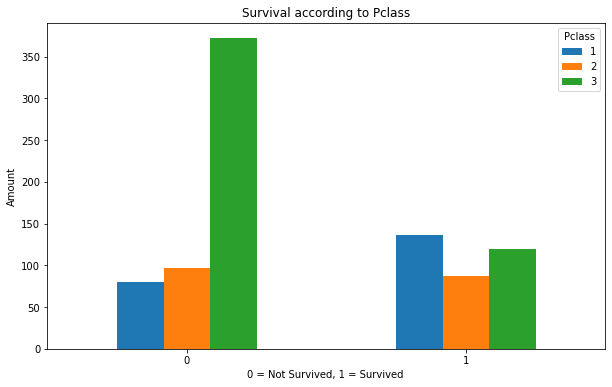

In [94]:
#Checking survival vs not survival
pd.crosstab(df.Survived, df.Pclass).plot(kind="bar", figsize=(10,6))
plt.title("Survival according to Pclass")
plt.xlabel("0 = Not Survived, 1 = Survived ")
plt.ylabel("Amount")
plt.xticks(rotation=0)

As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

### SibSp Feature


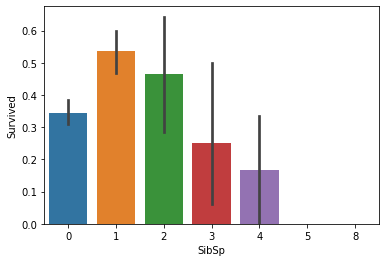

In [98]:
#ploting the SibSp Feature
sns.barplot(x="SibSp", y="Survived", data=df);

In [123]:
print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 3 who survived:", df["Survived"][df["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 4 who survived:", df["Survived"][df["SibSp"] == 4].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


In [105]:
pd.crosstab(df.Survived, df.SibSp)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

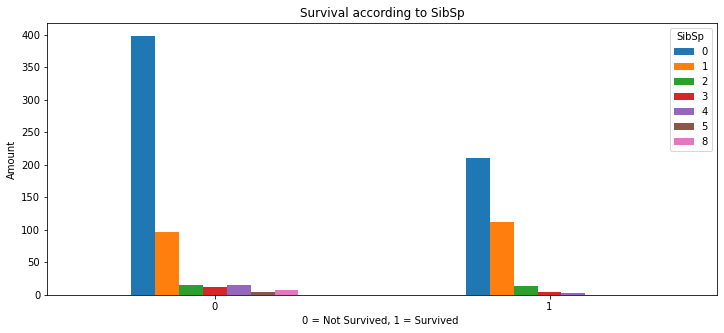

In [117]:
pd.crosstab(df.Survived, df.SibSp).plot(kind="bar", figsize=(12,5))
plt.title("Survival according to SibSp")
plt.xlabel("0 = Not Survived, 1 = Survived ")
plt.ylabel("Amount")
plt.xticks(rotation=0)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

### Parch Feature

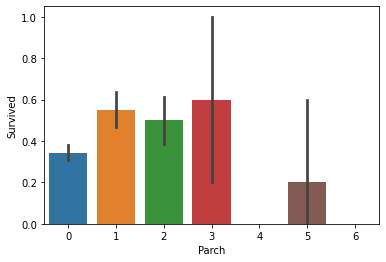

In [121]:
# ploting the Parch Feature
sns.barplot(x="Parch", y="Survived", data=df);

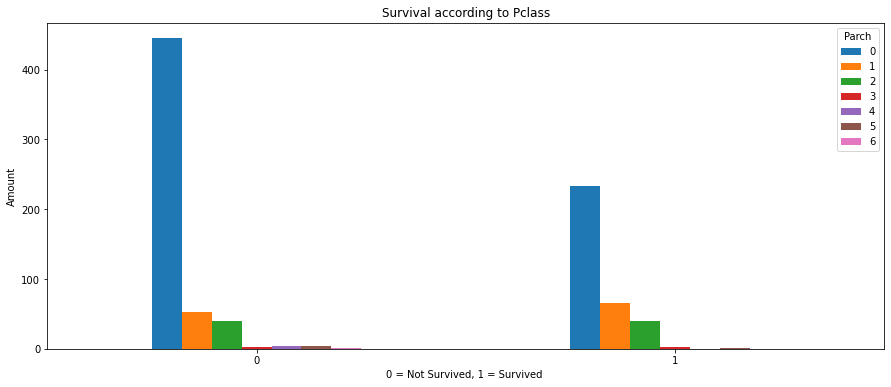

In [156]:
#Checking survival vs not survival
pd.crosstab(df.Survived, df.Parch).plot(kind="bar", figsize=(15,6))
plt.title("Survival according to Pclass")
plt.xlabel("0 = Not Survived, 1 = Survived ")
plt.ylabel("Amount")
plt.xticks(rotation=0);

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

### Age Feature

In [129]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [131]:
#sorting age feature in logical categories and as we have missing values we have to fill it 
df["Age"].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [134]:
#filling the data
df["Age"].fillna(-0.5).head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     -0.5
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    -0.5
18    31.0
19    -0.5
Name: Age, dtype: float64

In [26]:
copy_data = pd.read_csv('data/train.csv')
copy_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df["Embarked"] = copy_data["Embarked"]
df["Sex"] = copy_data["Sex"]
df["Age"] = copy_data["Age"]
[df["Survived"]==0] and df["Age"].fillna(df["Age"].mode()[0], inplace=True)
[df["Survived"]==1] and df["Age"].fillna(df["Age"].mode(), inplace=True)
#df["Age"][df["Survived"]==1].fillna(df["Age"].mode()[1], inplace=True)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df["AgeGroup"] = pd.cut(df["Age"], bins, labels=labels)
df["AgeGroup"]

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888        Student
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [359]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

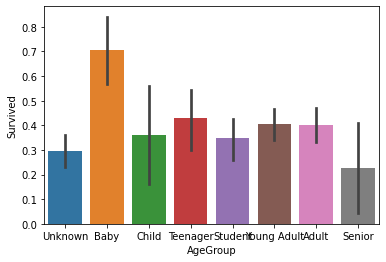

In [218]:
#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

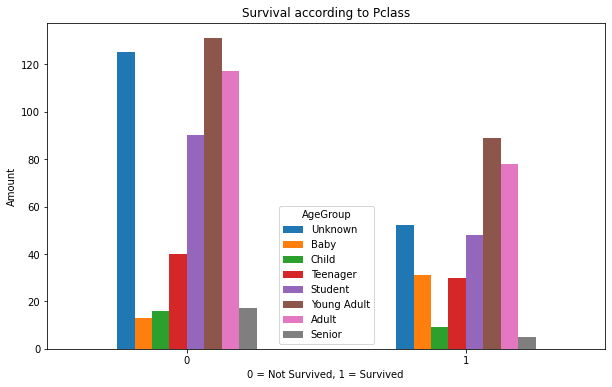

In [158]:
#Checking survival vs not survival
pd.crosstab(df.Survived, df.AgeGroup).plot(kind="bar", figsize=(10,6))
plt.title("Survival according to Pclass")
plt.xlabel("0 = Not Survived, 1 = Survived ")
plt.ylabel("Amount")
plt.xticks(rotation=0)

Babies are more likely to survive than any other age group.

### Cabin Feature

People with recorded cabin numbers are of higher socioeconomic class, and thus more likely to survive.

In [28]:
#Missing values
df["Cabin"].isna().sum()

687

In [146]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


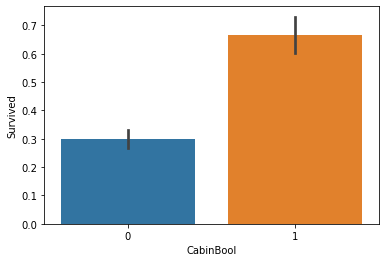

In [29]:
# need to turn this into a categorical feature 
df["CabinBool"] = (df["Cabin"].notnull().astype('int'))
#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", df["Survived"][df["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", df["Survived"][df["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=df)
plt.show()

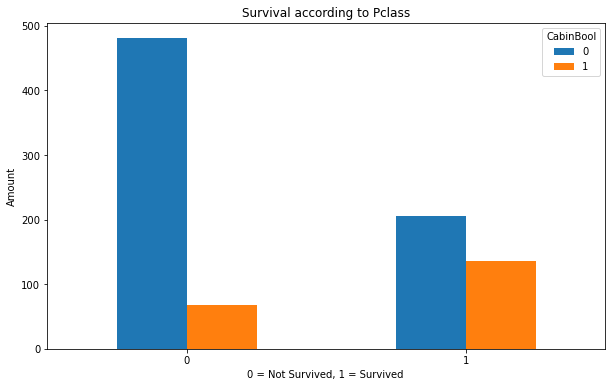

In [6]:
#Checking survival vs not survival
pd.crosstab(df.Survived, df.CabinBool).plot(kind="bar", figsize=(10,6))
plt.title("Survival according to Pclass")
plt.xlabel("0 = Not Survived, 1 = Survived ")
plt.ylabel("Amount")
plt.xticks(rotation=0);

People with a recorded Cabin number are, in fact, more likely to survive. (66.6% vs 29.9%)

### Cleaning the Data
> Removing unnecessary data that doesn't adds any value to the data

In [30]:
# this data if not much helpful, so droping them
#Cabin Feature and ticket feature
df.drop(["Cabin","Ticket"],axis =1, inplace= True)

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'AgeGroup', 'CabinBool'],
      dtype='object')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0


In [23]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
AgeGroup       0
CabinBool      0
dtype: int64

In [404]:
# WE need fill missinf values in embarked section
print("No. of people in embarking in Southampton (S):")
southhampton = df[df["Embarked"]== "S"].shape[0]
print(southhampton)

print("No. of people in embarking in Cherbourg (C):")
Cherbourg = df[df["Embarked"]== "C"].shape[0]
print(Cherbourg)

print("No. of people in embarking in Queenstown (Q):")
queenstown = df[df["Embarked"]== "Q"].shape[0]
print(queenstown)

No. of people in embarking in Southampton (S):
644
No. of people in embarking in Cherbourg (C):
168
No. of people in embarking in Queenstown (Q):
77


It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [32]:
df["Embarked"].fillna("S", inplace=True)

In [33]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
CabinBool      0
dtype: int64

### Preprocessing the data and filling missing values
As the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.

#### Function to EXTRACT the Name Titles from the dataset 

In [170]:
copy_data = pd.read_csv('data/train.csv')
#copy_data["Age"]

new_data["Age"] = copy_data["Age"] 

new_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,5.0,0,6.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,4.0,1,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S,NaN,0,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,5.0,1,3.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,5.0,0,3.0


In [34]:

def extract_title(df):
    """
    Extracting the title to make a new column name title which can be proved as valuable set to train model,
    in short
    grouping the data which are alike 
    """
    for new in [df]:
        #this regex searches for any name alphabet either upper or lower with (.) on its end 
        new['Title'] = new.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
                 
    return(pd.crosstab(df.Title, df.Sex))      

In [35]:
extract_title(df)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### Function to replace titles with names

In [36]:
def replace_name(df):
    """
    This will replace the titles with names 
    """
    for new in [df]:
        new['Title'] = new['Title'].replace(['Lady', 'Capt', 'Col',
                                            'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
        new['Title'] = new['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
        new['Title'] = new['Title'].replace('Mlle', 'Miss')
        new['Title'] = new['Title'].replace('Ms', 'Miss')
        new['Title'] = new['Title'].replace('Mme', 'Miss')
        
    return(df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())    

In [37]:
replace_name(df)

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.285714
5,Royal,1.000000


#### Function to preprocess all features and filling the missing values (age)


In [38]:
def preprocessing_data(df):
    """
    This function will preprocess(will convert all the featured data into 0's and 1's)
    and will fill the missing values in age(for test-data)
    """
    # Firstly mapping the titles 
    title_mapping = {"Mr": 1, "Miss":2, "Mr": 3, "Mrs": 4, "Rare": 6, "Royal": 5  }
    
    #implementing it into the dataset
    for new in [df]:
        new["Title"] = new["Title"].map(title_mapping)
        new["Title"] = new["Title"].fillna(0) # test_data
        
    #(df.head())
    # filling the missing age values with mode age group for each title
    mr_age = df[df["Title"] == 1]["AgeGroup"].mode() #Young Adult
    miss_age = df[df["Title"] == 2]["AgeGroup"].mode() #Student
    mrs_age = df[df["Title"] == 3]["AgeGroup"].mode() #Adult
    master_age = df[df["Title"] == 4]["AgeGroup"].mode() #Baby
    royal_age = df[df["Title"] == 5]["AgeGroup"].mode() #Adult
    rare_age = df[df["Title"] == 6]["AgeGroup"].mode() #Adult
    
    age_title_mapping = {0: "Student", 1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
        
    # Filling the missinf age values with mode of same title :)
    for x in range(len(df["AgeGroup"])):
        if df["AgeGroup"][x] == "Unknown":
            df["AgeGroup"][x] = age_title_mapping[df["Title"][x]]
            
        
    for x in range(len(df["Age"])):
        if df["Age"][x] == "NaN":
            if df["Survived"] == "0":
                df["Age"].fillna(df["Age"].mode[0], inplace=True)
                         
    #preprocessing the agegroup column
    agegroup_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
    df['AgeGroup'] = df['AgeGroup'].map(agegroup_mapping)  
    
    #maping sex feature
    sex_map = {"male":0, "female":1}
    df["Sex"] = df["Sex"].map(sex_map)
    
  #  map each Embarked value to a numerical value
    embarked_mapping = {"S": 1, "C": 2, "Q": 3}
    df['Embarked'] = df['Embarked'].map(embarked_mapping)
    
    #fill in missing Fare value in test set based on mean fare for that Pclass 
    for x in range(len(df["Fare"])):
        if pd.isnull(df["Fare"][x]):
            pclass = df["Pclass"][x] #Pclass = 3
            df["Fare"][x] = round(df[df["Pclass"] == pclass]["Fare"].mean(), 4)
    
    #map Fare values into groups of numerical values
    df['FareBand'] = pd.qcut(df['Fare'], 4, labels = [1, 2, 3, 4])
    
    return df

In [39]:
preprocessing_data(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,4.0,0,3.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,6.0,1,4.0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,5.0,0,2.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,5.0,1,4.0,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,5.0,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,1,5.0,0,6.0,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,1,4.0,1,2.0,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24.0,1,2,23.4500,1,4.0,0,2.0,3
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,2,5.0,1,3.0,3


In [412]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'AgeGroup', 'CabinBool', 'Title',
       'Ageis missing', 'AgeGroupis missing', 'FareBand'],
      dtype='object')>

In [40]:
# Lets drop the unnecessary data now
def drop_data(df):  
    # can use age to improve model
    df = df.drop(['Name', 'Fare', 'Age'], axis =1, inplace=True)
    return df


In [44]:
drop_data(df)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,3.0,1
1,2,1,1,1,1,0,2,6.0,1,4.0,4
2,3,1,3,1,0,0,1,5.0,0,2.0,2
3,4,1,1,1,1,0,1,5.0,1,4.0,4
4,5,0,3,0,0,0,1,5.0,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,1,5.0,0,6.0,2
887,888,1,1,1,0,0,1,4.0,1,2.0,3
888,889,0,3,1,1,2,1,4.0,0,2.0,3
889,890,1,1,0,0,0,2,5.0,1,3.0,3


### Loadind the Test Data
and making it ready for prediction 


In [56]:
test = pd.read_csv("data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
# adding agegroup to the test dataset
test["Age"].fillna(test["Age"].mode()[0], inplace=True)

#df["Age"][df["Survived"]==1].fillna(df["Age"].mode()[1], inplace=True)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
test["AgeGroup"] = pd.cut(test["Age"], bins, labels=labels)
test["AgeGroup"] 

0      Young Adult
1            Adult
2           Senior
3      Young Adult
4          Student
          ...     
413        Student
414          Adult
415          Adult
416        Student
417        Student
Name: AgeGroup, Length: 418, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [58]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
dtype: int64

In [59]:
# Setting up Cabin
# WE need fill missinf values in embarked section
print("No. of people in embarking in Southampton (S):")
southhampton = test[test["Embarked"]== "S"].shape[0]
print(southhampton)

print("No. of people in embarking in Cherbourg (C):")
Cherbourg = test[test["Embarked"]== "C"].shape[0]
print(Cherbourg)

print("No. of people in embarking in Queenstown (Q):")
queenstown = test[test["Embarked"]== "Q"].shape[0]
print(queenstown)

No. of people in embarking in Southampton (S):
270
No. of people in embarking in Cherbourg (C):
102
No. of people in embarking in Queenstown (Q):
46


In [60]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
dtype: int64

In [61]:
# Lets extract title from the test dataset
extract_title(test)

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [62]:
# need to turn this into a categorical feature 
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))


In [63]:
preprocessing_data(test)

<ipython-input-38-213c7702270b>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fare"][x] = round(df[df["Pclass"] == pclass]["Fare"].mean(), 4)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,CabinBool,FareBand
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3,5.0,3.0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,6.0,4.0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3,7.0,3.0,0,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1,5.0,3.0,0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1,4.0,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,21.0,0,0,A.5. 3236,8.0500,NaN,1,4.0,3.0,0,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2,6.0,0.0,1,4
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,6.0,3.0,0,1
416,1308,3,"Ware, Mr. Frederick",0,21.0,0,0,359309,8.0500,NaN,1,4.0,3.0,0,2


In [64]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeGroup         0
Title            0
CabinBool        0
FareBand         0
dtype: int64

In [65]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,3.0,1
1,2,1,1,1,1,0,2,6.0,1,4.0,4
2,3,1,3,1,0,0,1,5.0,0,2.0,2
3,4,1,1,1,1,0,1,5.0,1,4.0,4
4,5,0,3,0,0,0,1,5.0,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,1,5.0,0,6.0,2
887,888,1,1,1,0,0,1,4.0,1,2.0,3
888,889,0,3,1,1,2,1,4.0,0,2.0,3
889,890,1,1,0,0,0,2,5.0,1,3.0,3


In [66]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,CabinBool,FareBand
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3,5.0,3.0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,6.0,4.0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3,7.0,3.0,0,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1,5.0,3.0,0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1,4.0,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,21.0,0,0,A.5. 3236,8.0500,NaN,1,4.0,3.0,0,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2,6.0,0.0,1,4
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,6.0,3.0,0,1
416,1308,3,"Ware, Mr. Frederick",0,21.0,0,0,359309,8.0500,NaN,1,4.0,3.0,0,2


In [67]:
drop_data(test)

In [73]:
test.drop(["Ticket"], axis=1, inplace=True)

In [72]:
test.drop(["Cabin"], axis=1, inplace=True)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,3.0,1
1,2,1,1,1,1,0,2,6.0,1,4.0,4
2,3,1,3,1,0,0,1,5.0,0,2.0,2
3,4,1,1,1,1,0,1,5.0,1,4.0,4
4,5,0,3,0,0,0,1,5.0,0,3.0,2


### Choosing the best Model

Models i will be testing :
1. Logistic Regression
2. Gradient Boosting Classifier
3. RandomForestClassifier
4. Decision Tree
5. KNN

In [85]:
# Putting models in a dicitionary
models = {"Logistic Regression": LogisticRegression() ,
          "Gradient Boosting Classifier": GradientBoostingClassifier(),
          "RandomForestClassifier": RandomForestClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier()}

#Function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and Evaluates given machine learning models
    """
    np.random.seed(21)
    # dict. to keep model score
    model_scores = {}
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        
        #appending the model scores in dic
        model_scores[name] = model.score(X_val, y_val)
    
    return model_scores

In [97]:
### Let's split the dataset into Training and validation set
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 0)



In [77]:
X

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,3,0,1,0,1,4.0,0,3.0,1
1,2,1,1,1,0,2,6.0,1,4.0,4
2,3,3,1,0,0,1,5.0,0,2.0,2
3,4,1,1,1,0,1,5.0,1,4.0,4
4,5,3,0,0,0,1,5.0,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,0,0,1,5.0,0,6.0,2
887,888,1,1,0,0,1,4.0,1,2.0,3
888,889,3,1,1,2,1,4.0,0,2.0,3
889,890,1,0,0,0,2,5.0,1,3.0,3


In [78]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [120]:
model_scores = fit_and_score(models=models, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val )

e:\project\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
model_scores

{'Logistic Regression': 0.8212290502793296,
 'Gradient Boosting Classifier': 0.8547486033519553,
 'RandomForestClassifier': 0.8324022346368715,
 'Decision Tree Classifier': 0.7541899441340782,
 'KNN': 0.5810055865921788}

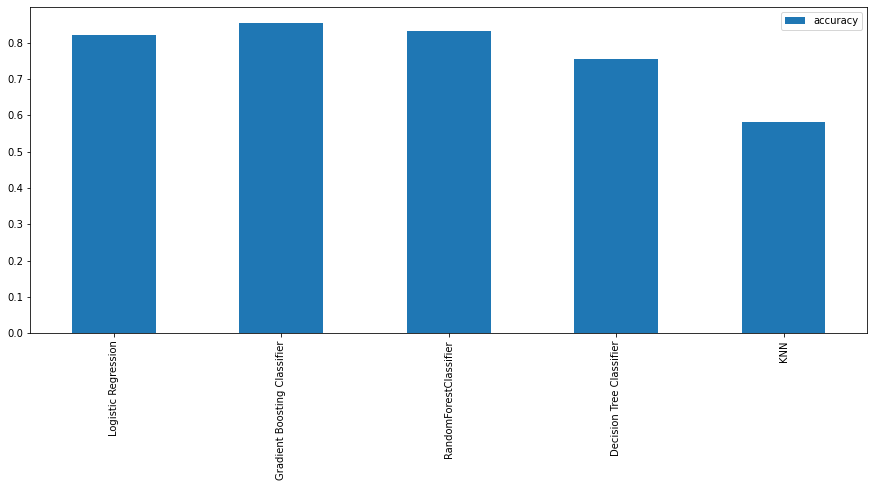

In [107]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,6));

In [110]:
model_compare.T

,accuracy
Logistic Regression,0.821229
Gradient Boosting Classifier,0.854749
RandomForestClassifier,0.832402
Decision Tree Classifier,0.754190
KNN,0.581006


We weill go with GradientBoostingClassifier

In [124]:
#lets's predict with test data
ids = test["PassengerId"]
gdk = GradientBoostingClassifier()
gdk.fit(X_train, y_train)
preds = gdk.predict(test)


In [125]:
preds

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [126]:
#outputig the submission file
output = pd.DataFrame({"PassengerId":ids, "Survived":preds})
output.to_csv('submission.csv', index=False)